# Simple Linear Regression

### Build a Simple Linear Regression model for logistic company to find the relationship between delivery time and sorting time, where delivery time is the target variable. Also understand the correaltion and RMSE between the delivery time and sorting time.

In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from feature_engine.outliers import Winsorizer
from sklearn.model_selection import train_test_split

import statsmodels.formula.api as smf

In [2]:
# import dataset
logistic_df = pd.read_csv(r"D:\360digi\DS\Sharath\Simple_linearRegression\handson\Datasets_SLR\delivery_time.csv")
logistic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [3]:
logistic_df.columns = ['Delivery_Time', 'Sorting_Time']

In [4]:
logistic_df.head()

,Delivery_Time,Sorting_Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [5]:
logistic_df.describe()

,Delivery_Time,Sorting_Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


In [6]:
logistic_df.sort_values('Sorting_Time', ascending = True, inplace = True)

In [7]:
logistic_df.reset_index(inplace = True, drop = True)

In [8]:
logistic_df.head(10)

,Delivery_Time,Sorting_Time
0,8.00,2
1,9.50,3
2,11.50,3
3,12.03,3
4,13.50,4
5,14.88,4
6,10.75,4
7,21.50,5
8,19.75,6
9,15.35,6


In [9]:
# missing value check
logistic_df.isnull().sum()

Delivery_Time    0
Sorting_Time     0
dtype: int64

In [10]:
# Split the data into Target and Predictors
X = pd.DataFrame(logistic_df['Sorting_Time'])
Y = pd.DataFrame(logistic_df['Delivery_Time'])

In [11]:
# Select numeric features for data preprocessing
numeric_features = ['Sorting_Time']

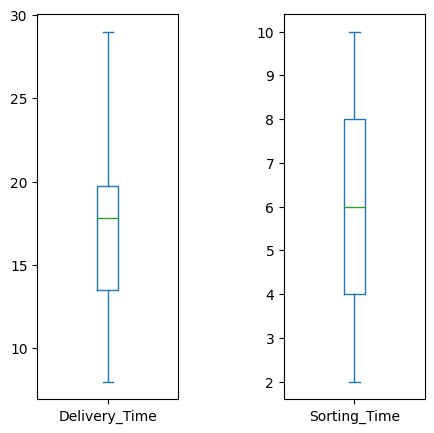

In [12]:
# box plot visualisation
logistic_df.plot(kind = 'box', subplots = True, sharey = False, figsize = (5,5))
plt.subplots_adjust(wspace = 0.75)
plt.show()
#No outliers

In [13]:
# Below steps are not necessary for our dataset but creating a pipeline so we can test the algorithm with new dataset easily.

In [14]:
# Winsorization
winsor = Winsorizer(capping_method = 'iqr', tail = 'both', fold = 1.5, variables = numeric_features)
winsor

Winsorizer(capping_method='iqr', fold=1.5, tail='both',
           variables=['Sorting_Time'])

In [15]:
num_pipeline = Pipeline(steps = [('impute', SimpleImputer(strategy = 'mean'))])
num_pipeline

Pipeline(steps=[('impute', SimpleImputer())])

In [16]:
outlier_pipeline = Pipeline(steps = [('winsor', winsor)])
outlier_pipeline

Pipeline(steps=[('winsor',
                 Winsorizer(capping_method='iqr', fold=1.5, tail='both',
                            variables=['Sorting_Time']))])

In [17]:
preprocessor = ColumnTransformer(transformers = [('num', num_pipeline, numeric_features)])
print(preprocessor)

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('impute', SimpleImputer())]),
                                 ['Sorting_Time'])])


In [18]:
preprocessor1 = ColumnTransformer(transformers = [('wins', outlier_pipeline, numeric_features)])
print(preprocessor1)

ColumnTransformer(transformers=[('wins',
                                 Pipeline(steps=[('winsor',
                                                  Winsorizer(capping_method='iqr',
                                                             fold=1.5,
                                                             tail='both',
                                                             variables=['Sorting_Time']))]),
                                 ['Sorting_Time'])])


In [19]:
impute_data = preprocessor.fit(X)

In [20]:
logistic_df['Sorting_Time'] = pd.DataFrame(impute_data.transform(X))

In [21]:
X2 = pd.DataFrame(logistic_df['Sorting_Time'])

In [22]:
winz_data = preprocessor1.fit(X2)

In [23]:
logistic_df['Sorting_Time'] = pd.DataFrame(winz_data.transform(X))

In [24]:
logistic_df

,Delivery_Time,Sorting_Time
0,8.00,2
1,9.50,3
2,11.50,3
3,12.03,3
4,13.50,4
5,14.88,4
6,10.75,4
7,21.50,5
8,19.75,6
9,15.35,6


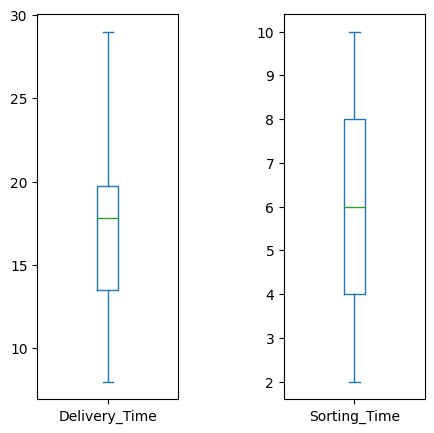

In [25]:
# box plot visualisation
logistic_df.plot(kind = 'box', subplots = True, sharey = False, figsize = (5,5))
plt.subplots_adjust(wspace = 0.75)
plt.show()
#No outliers

In [26]:
logistic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery_Time  21 non-null     float64
 1   Sorting_Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [27]:
logistic_df.columns

Index(['Delivery_Time', 'Sorting_Time'], dtype='object')

In [ ]:
# Graphical analysis

<BarContainer object of 21 artists>

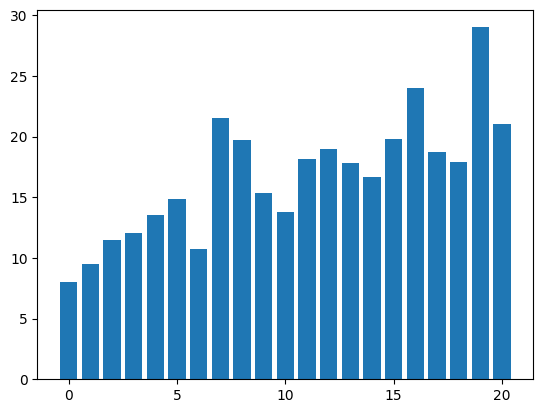

In [28]:
plt.bar(height = logistic_df.Delivery_Time, x = np.arange(21))


(array([2., 3., 2., 2., 4., 4., 2., 1., 0., 1.]),
 array([ 8. , 10.1, 12.2, 14.3, 16.4, 18.5, 20.6, 22.7, 24.8, 26.9, 29. ]),
 <BarContainer object of 10 artists>)

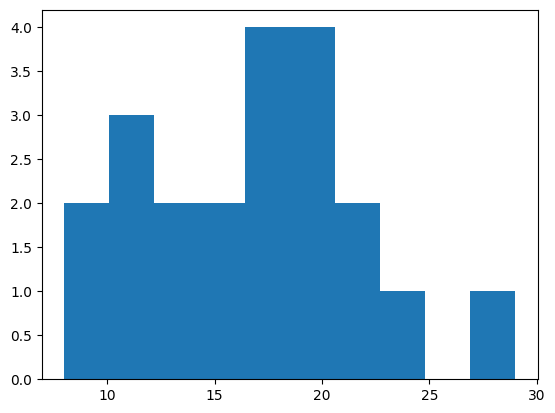

In [29]:
plt.hist(logistic_df.Delivery_Time) #histogram

<BarContainer object of 21 artists>

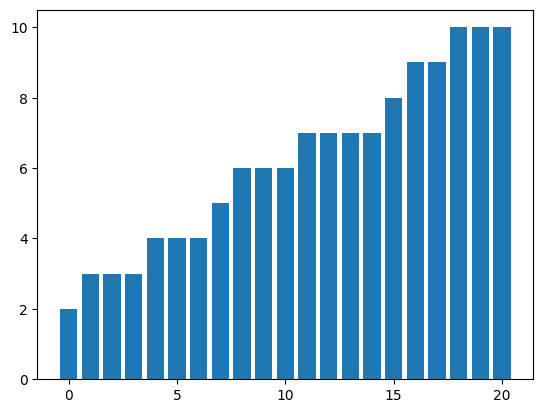

In [30]:
plt.bar(height = logistic_df.Sorting_Time, x = np.arange(21))


(array([1., 3., 3., 1., 0., 3., 4., 1., 2., 3.]),
 array([ 2. ,  2.8,  3.6,  4.4,  5.2,  6. ,  6.8,  7.6,  8.4,  9.2, 10. ]),
 <BarContainer object of 10 artists>)

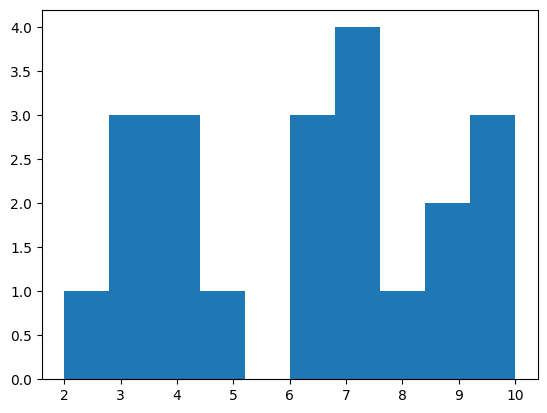

In [31]:
plt.hist(logistic_df.Sorting_Time)

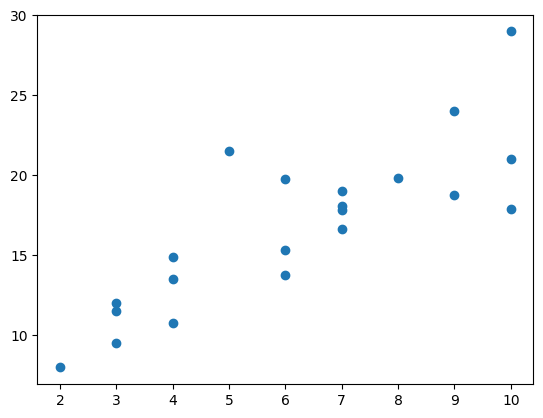

In [32]:
# # Bivariate Analysis
# Scatter plot
plt.scatter(x = logistic_df['Sorting_Time'], y = logistic_df['Delivery_Time']) 

In [33]:
# Direction : positive

In [34]:
# Correlation coefficient
np.corrcoef(logistic_df.Sorting_Time, logistic_df.Delivery_Time)

array([[1.        , 0.82599726],
       [0.82599726, 1.        ]])

In [35]:
# Covariance
cov_output = np.cov(logistic_df.Sorting_Time, logistic_df.Delivery_Time)[0, 1]
cov_output

10.655809523809523

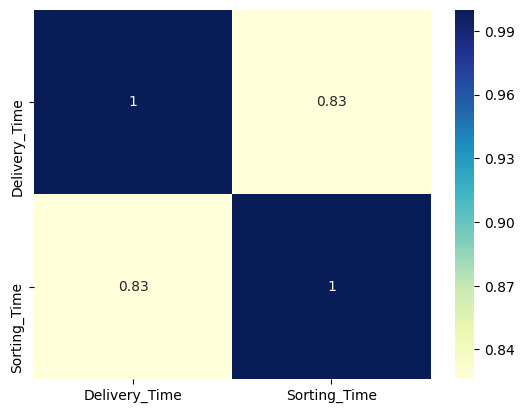

In [36]:
#Heatmap
dataplot = sns.heatmap(logistic_df.corr(), annot = True, cmap = "YlGnBu")

# Regression Techniques

#### Simple Linear Regression Y ~ X

In [37]:
model = smf.ols('Delivery_Time ~ Sorting_Time', data = logistic_df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Delivery_Time   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Sat, 25 Feb 2023   Prob (F-statistic):           3.98e-06
Time:                        00:50:43   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        6.5827      1.722      3.823      0.001       2.979      10.186
Sorting_Time     1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   2.322
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
# Delivery_Time = 6.5827 + 1.6490(Sorting_Time)
# R-squared : 0.682  where |r| < 0.85 is considered as moderate correlation
# RMSE : 2.7916

In [38]:
pred1 = model.predict(pd.DataFrame(logistic_df['Sorting_Time']))

pred1

0      9.880774
1     11.529794
2     11.529794
3     11.529794
4     13.178814
5     13.178814
6     13.178814
7     14.827833
8     16.476853
9     16.476853
10    16.476853
11    18.125873
12    18.125873
13    18.125873
14    18.125873
15    19.774893
16    21.423913
17    21.423913
18    23.072933
19    23.072933
20    23.072933
dtype: float64

In [39]:
# Error calculation (error = AV - PV)
res1 = logistic_df.Delivery_Time - pred1

print(np.mean(res1))

1.2688263138573218e-15


In [40]:
res_sqr1 = res1 * res1
mse1 = np.mean(res_sqr1)
rmse1 = np.sqrt(mse1)
rmse1

2.7916503270617654

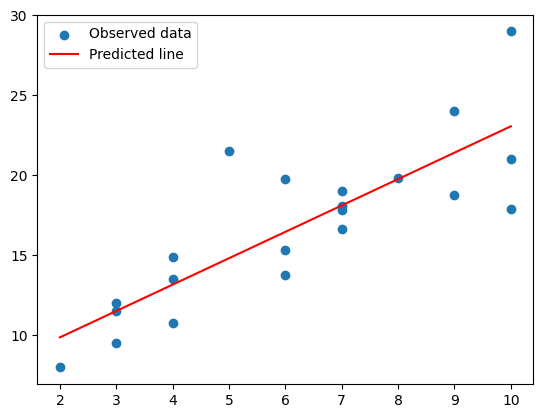

In [41]:
# Regression Line
plt.scatter(logistic_df.Sorting_Time, logistic_df.Delivery_Time)
plt.plot(logistic_df.Sorting_Time, pred1, "r")
plt.legend(['Observed data', 'Predicted line'])
plt.show()

## Model Tuning with Transformations

### Log Transformation
### x = log(Sorting_Time); y = Delivery_Time

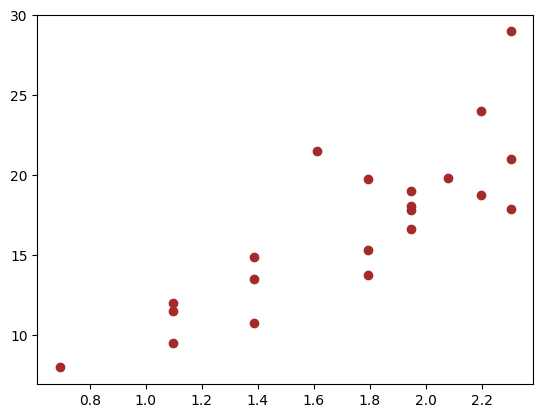

In [42]:
plt.scatter(x = np.log(logistic_df['Sorting_Time']), y = logistic_df['Delivery_Time'], color = 'brown')

In [43]:
#correlation
np.corrcoef(np.log(logistic_df.Sorting_Time), logistic_df.Delivery_Time)

array([[1.        , 0.83393253],
       [0.83393253, 1.        ]])

In [44]:
model2 = smf.ols('Delivery_Time ~ np.log(Sorting_Time)', data = logistic_df).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Delivery_Time   R-squared:                       0.695
Model:                            OLS   Adj. R-squared:                  0.679
Method:                 Least Squares   F-statistic:                     43.39
Date:                Sat, 25 Feb 2023   Prob (F-statistic):           2.64e-06
Time:                        00:50:58   Log-Likelihood:                -50.912
No. Observations:                  21   AIC:                             105.8
Df Residuals:                      19   BIC:                             107.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                1.1597      2.455      0.472      0.642      -3.978       6.297
np.log(Sorting_Time)     9.0434      1.373      6.587      0.000       6.170      11.917
==============================================================================
Omnibus:                        5.552   Durbin-Watson:                   2.439
Prob(Omnibus):                  0.062   Jarque-Bera (JB):                3.481
Skew:                           0.946   Prob(JB):                        0.175
Kurtosis:                       3.628   Cond. No.                         9.08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
# cal = 1.1597 + 9.0434(log(Sorting_Time))
# R-squared : 0.695  where |r| < 0.85 is considered as moderate correlation
# RMSE : 2.7331

In [45]:
pred2 = model2.predict(pd.DataFrame(logistic_df['Sorting_Time']))

In [46]:
# Error calculation
res2 = logistic_df.Delivery_Time - pred2
res_sqr2 = res2 * res2
mse2 = np.mean(res_sqr2)
rmse2 = np.sqrt(mse2)
rmse2

2.7331714766820667

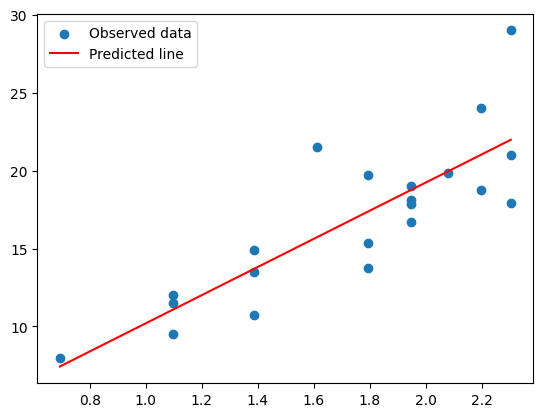

In [47]:
# Regression Line
plt.scatter(np.log(logistic_df.Sorting_Time), logistic_df.Delivery_Time)
plt.plot(np.log(logistic_df.Sorting_Time), pred2, "r")
plt.legend(['Observed data', 'Predicted line'])
plt.show()

### Exponential transformation
### x = Sorting_Time; y = log(Delivery_Time)

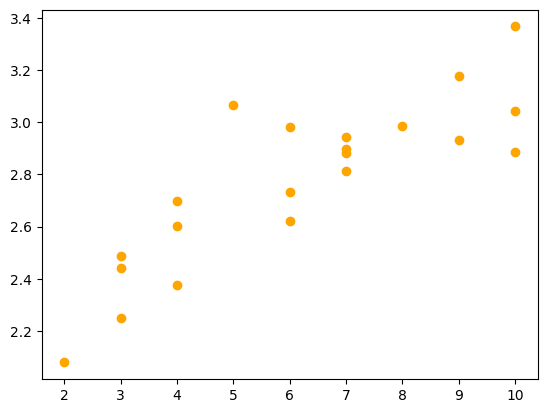

In [48]:
plt.scatter(x = logistic_df['Sorting_Time'], y = np.log(logistic_df['Delivery_Time']), color = 'orange')

In [49]:
#correlation
np.corrcoef(logistic_df.Sorting_Time, np.log(logistic_df.Delivery_Time))

array([[1.        , 0.84317726],
       [0.84317726, 1.        ]])

In [50]:
model3 = smf.ols('np.log(Delivery_Time) ~ Sorting_Time', data = logistic_df).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     np.log(Delivery_Time)   R-squared:                       0.711
Model:                               OLS   Adj. R-squared:                  0.696
Method:                    Least Squares   F-statistic:                     46.73
Date:                   Sat, 25 Feb 2023   Prob (F-statistic):           1.59e-06
Time:                           00:51:09   Log-Likelihood:                 7.7920
No. Observations:                     21   AIC:                            -11.58
Df Residuals:                         19   BIC:                            -9.495
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        2.1214      0.103     20.601      0.000       1.906       2.337
Sorting_Time     0.1056      0.015      6.836      0.000       0.073       0.138
==============================================================================
Omnibus:                        1.238   Durbin-Watson:                   1.858
Prob(Omnibus):                  0.538   Jarque-Bera (JB):                0.544
Skew:                           0.393   Prob(JB):                        0.762
Kurtosis:                       3.067   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
# log(Delivery_Time) = 2.1214 + 0.1056(Sorting_Time)
# R-squared : 0.711  where |r| < 0.85 is considered as moderate correlation
# RMSE : 2.9402

In [51]:
pred3 = model3.predict(pd.DataFrame(logistic_df['Sorting_Time']))

In [52]:
pred3_at = np.exp(pred3)
print(pred3_at)

0     10.303411
1     11.450423
2     11.450423
3     11.450423
4     12.725123
5     12.725123
6     12.725123
7     14.141728
8     15.716034
9     15.716034
10    15.716034
11    17.465597
12    17.465597
13    17.465597
14    17.465597
15    19.409927
16    21.570707
17    21.570707
18    23.972032
19    23.972032
20    23.972032
dtype: float64


In [53]:
res3 = logistic_df.Delivery_Time - pred3_at
res_sqr3 = res3 * res3
mse3 = np.mean(res_sqr3)
rmse3 = np.sqrt(mse3)
rmse3

2.940250323056202

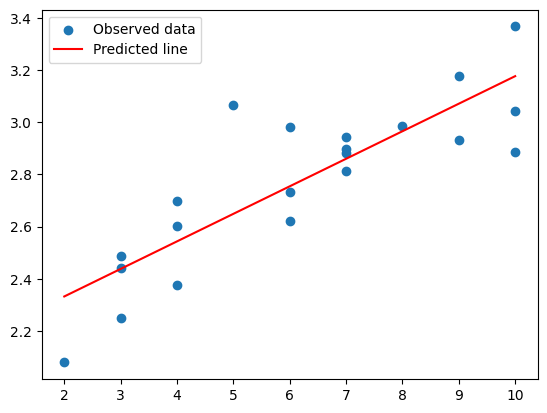

In [54]:
# Regression Line
plt.scatter(logistic_df.Sorting_Time, np.log(logistic_df.Delivery_Time))
plt.plot(logistic_df.Sorting_Time, pred3, "r")
plt.legend(['Observed data', 'Predicted line'])
plt.show()

### Polynomial transformation 
### x = Sorting_Time; x^2 = Sorting_Time*Sorting_Time; y = log(Delivery_Time)
### log(y) ~ x + x^2

In [55]:
X = pd.DataFrame(logistic_df['Sorting_Time'])

In [56]:
Y = pd.DataFrame(logistic_df['Delivery_Time'])

In [57]:
model4 = smf.ols('np.log(Delivery_Time) ~ Sorting_Time + I(Sorting_Time*Sorting_Time)', data = logistic_df).fit()
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     np.log(Delivery_Time)   R-squared:                       0.765
Model:                               OLS   Adj. R-squared:                  0.739
Method:                    Least Squares   F-statistic:                     29.28
Date:                   Sat, 25 Feb 2023   Prob (F-statistic):           2.20e-06
Time:                           00:51:21   Log-Likelihood:                 9.9597
No. Observations:                     21   AIC:                            -13.92
Df Residuals:                         18   BIC:                            -10.79
Df Model:                              2                                         
Covariance Type:               nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept                          1.6997      0.228      7.441      0.000       1.220       2.180
Sorting_Time                       0.2659      0.080      3.315      0.004       0.097       0.434
I(Sorting_Time * Sorting_Time)    -0.0128      0.006     -2.032      0.057      -0.026       0.000
==============================================================================
Omnibus:                        2.548   Durbin-Watson:                   2.200
Prob(Omnibus):                  0.280   Jarque-Bera (JB):                1.777
Skew:                           0.708   Prob(JB):                        0.411
Kurtosis:                       2.846   Cond. No.                         373.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
# log(Delivery_Time) = 1.6997 + 0.2659(Sorting_Time) -0.0128(Sorting_Time*Sorting_Time)
# R-squared : 0.765  where |r| < 0.85 is considered as moderate correlation
# RMSE : 2.7990

In [58]:
pred4 = model4.predict(pd.DataFrame(logistic_df))
print(pred4)

0     2.180186
1     2.381905
2     2.381905
3     2.381905
4     2.557942
5     2.557942
6     2.557942
7     2.708299
8     2.832974
9     2.832974
10    2.832974
11    2.931968
12    2.931968
13    2.931968
14    2.931968
15    3.005281
16    3.052913
17    3.052913
18    3.074863
19    3.074863
20    3.074863
dtype: float64


In [59]:
pred4_at = np.exp(pred4)
pred4_at

0      8.847949
1     10.825502
2     10.825502
3     10.825502
4     12.909227
5     12.909227
6     12.909227
7     15.003730
8     16.995933
9     16.995933
10    16.995933
11    18.764526
12    18.764526
13    18.764526
14    18.764526
15    20.191891
16    21.176938
17    21.176938
18    21.646921
19    21.646921
20    21.646921
dtype: float64

In [60]:
# Error calculation
res4 = logistic_df.Delivery_Time - pred4_at
res_sqr4 = res4 * res4
mse4 = np.mean(res_sqr4)
rmse4 = np.sqrt(mse4)
rmse4

2.799041988740926

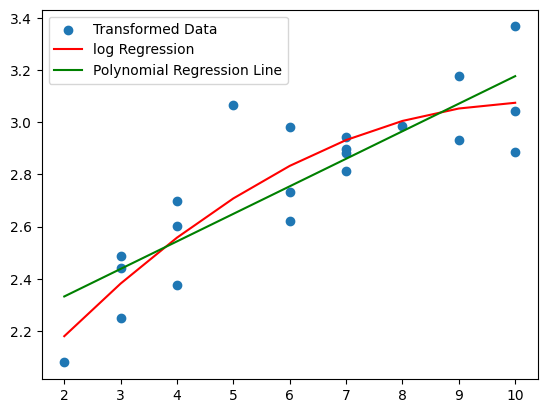

In [61]:
plt.scatter(X['Sorting_Time'], np.log(Y['Delivery_Time']))
plt.plot(X['Sorting_Time'], pred4, color = 'red')
plt.plot(X['Sorting_Time'], pred3, color = 'green', label = 'linear')
#plt.plot(X['Sorting_Time'], pred2, color = 'pink')
plt.legend(['Transformed Data', 'log Regression', 'Polynomial Regression Line', 'Linear Regression Line'])
plt.show()

## Choose the best model using RMSE

In [62]:
data1 = {"MODEL":pd.Series(["SLR", "Log model", "Exp model", "Poly model"]), "RMSE":pd.Series([rmse1, rmse2, rmse3, rmse4])}
table_rmse = pd.DataFrame(data1)

In [63]:
table_rmse

,MODEL,RMSE
0,SLR,2.791650
1,Log model,2.733171
2,Exp model,2.940250
3,Poly model,2.799042


In [ ]:
# The model with low RMSE value is the best model. log Regression is the best model with :
# cal = 1.1597 + 9.0434(log(Sorting_Time))
# R-squared : 0.695  where |r| < 0.85 is considered as moderate correlation
# RMSE : 2.7331